In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

DATA_RAW_PATH = os.path.abspath(os.path.join(
    os.getcwd(), "../data/raw"))
DATA_OUTPUT_PATH = os.path.abspath(os.path.join(os.getcwd(), "../data/output"))

# To get the example images that below worked on please first run the download_assets.py file

In [13]:
def display_plots(image_map: dict, figsize: list, ncols: int, ):
    plt.figure(figsize=figsize)
    nrows = 1
    for key in image_map:
        plt.subplot(1, ncols, nrows)
        plt.imshow(image_map[key])
        plt.title(key)
        nrows += 1
    

#### Basic Image Enhancement Using Mathematical Operations
Image Processing techniques take advantage of mathematical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic operations. We will take a look at some of the fundamental operations often used in computer vision pipelines. In this notebook we will cover:

* Arithmetic Operations like addition, multiplication
* Thresholding & Masking
* Bitwise Operations like OR, AND, XOR

Image shape (H, W, C):  (600, 840, 3)
Image data type:  uint8


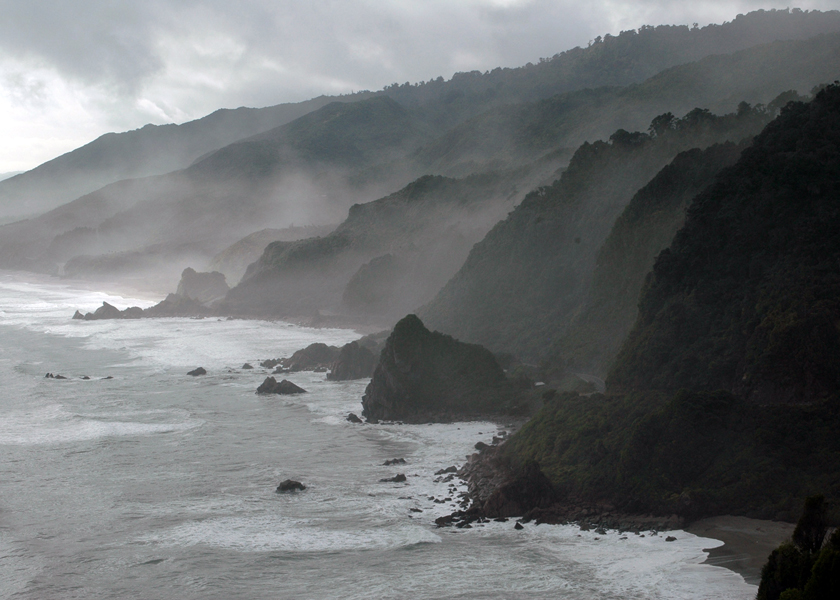

In [14]:
img_path = f"{DATA_RAW_PATH}/New_Zealand_Coast.jpg"
img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

print("Image shape (H, W, C): ", img_rgb.shape)
print("Image data type: ", img_rgb.dtype)

Image(filename=img_path)


#### Addition or Brightness
The first operation is simple addition of images. This results in increasing or decreasing the brightness of the image since we are eventually increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in a global increase/decrease in brightness.

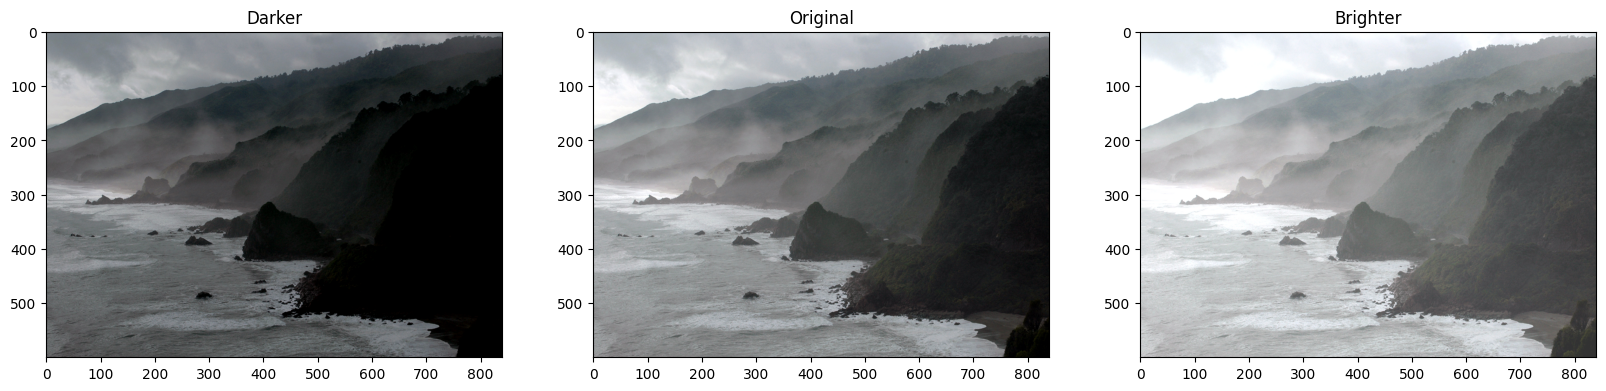

In [15]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

# Adds 50 to every pixel channel value -> Red: R + 50, Green: G + 50, Blue: B + 50
img_brighter = cv2.add(img_rgb, matrix)
# Substract 50 from very pixel channel value -> ...
img_darker = cv2.subtract(img_rgb, matrix)

image_map = {
    "Darker": img_darker,
    "Original": img_rgb,
    "Brighter": img_brighter
}


display_plots(image_map, figsize=[20,5], ncols=3)

#### Why cv2.add/cv2.subtract and not + or -? with numpy array directly?
Using NumPy’s + or - directly on uint8, it wraps around instead of clipping:

import numpy as np
np.array([250], dtype="uint8") + 10  # → 4  (wrong! wraps at 255)
- 250 + 10 = 260
- uint8 can only store 0–255
- it wraps: 260 - 256 = 4

#### Multiplication or Contrast
Just like addition can result in brightness change, multiplication can be used to improve the contrast of the image.

Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller ( if multiplying factor is < 1 ).

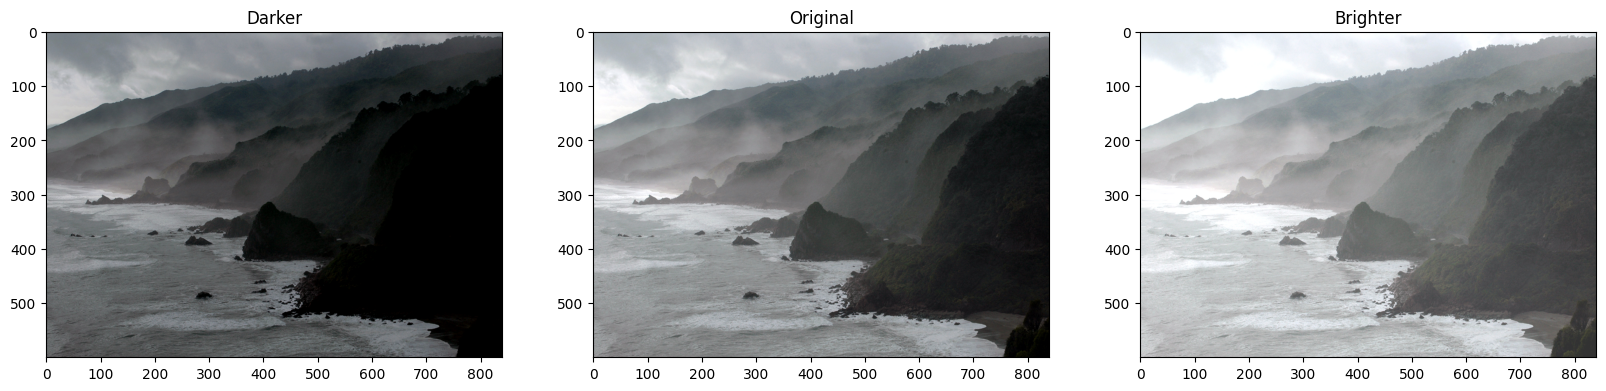

In [16]:
# np.ones() defalut data type is float64
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2 

# Convert image to float64 to safely multiply 
img_float = np.float64(img_rgb)

# Multiply each pixel by the scale matrix (element-wise)
# Both operands must be the same type: float64
img_rgb_darker   = np.uint8(cv2.multiply(img_float, matrix1))  
img_rgb_brighter = np.uint8(cv2.multiply(img_float, matrix2))  

image_map = {
    "Darker": img_darker,
    "Original": img_rgb,
    "Brighter": img_brighter
}

display_plots(image_map, figsize=[20,5], ncols=3)